Primeiros dados
   1  0  0.99539  -0.05889  0.85243  0.02306  0.83398  -0.37708      1.1  \
0  1  0  1.00000  -0.18829  0.93035 -0.36156 -0.10868  -0.93597  1.00000   
1  1  0  1.00000  -0.03365  1.00000  0.00485  1.00000  -0.12062  0.88965   
2  1  0  1.00000  -0.45161  1.00000  1.00000  0.71216  -1.00000  0.00000   
3  1  0  1.00000  -0.02401  0.94140  0.06531  0.92106  -0.23255  0.77152   
4  1  0  0.02337  -0.00592 -0.09924 -0.11949 -0.00763  -0.11824  0.14706   

   0.03760  ...  -0.51171  0.41078  -0.46168  0.21266  -0.34090  0.42267  \
0 -0.04549  ...  -0.26569 -0.20468  -0.18401 -0.19040  -0.11593 -0.16626   
1  0.01198  ...  -0.40220  0.58984  -0.22145  0.43100  -0.17365  0.60436   
2  0.00000  ...   0.90695  0.51613   1.00000  1.00000  -0.20099  0.25682   
3 -0.16399  ...  -0.65158  0.13290  -0.53206  0.02431  -0.62197 -0.05707   
4  0.06637  ...  -0.01535 -0.03240   0.09223 -0.07859   0.00732  0.00000   

   -0.54487  0.18641  -0.45300  g  
0  -0.06288 -0.13738  -0.02447  b 

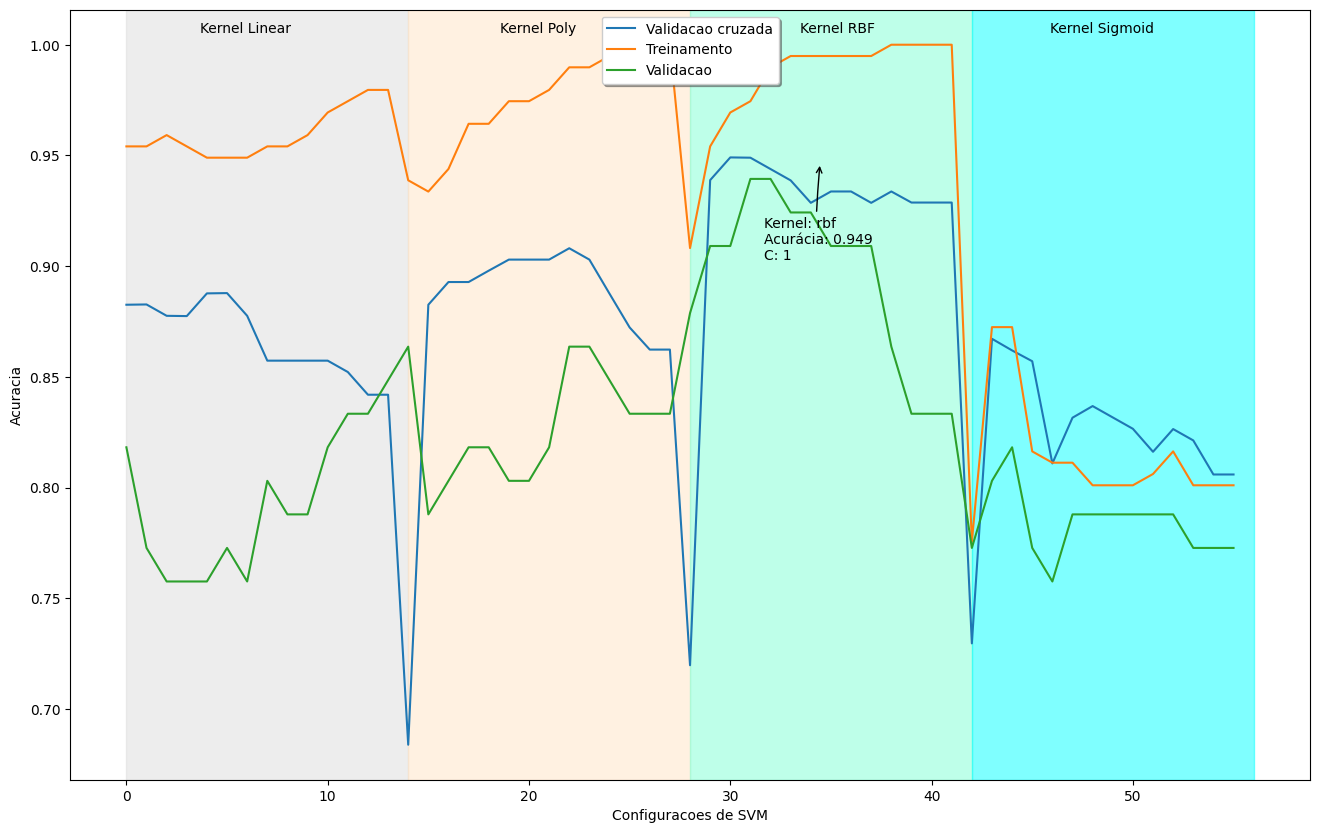

Desempenho da melhor configuracao testada:
Acuracia de treinamento clf: 0.954
Acuracia de validacao clf: 0.909
Acuracia de teste clf: 0.943


In [8]:
#
#
# USANDO O SVM NA BASE DE DADOS DO DIABETES
# ESCOLHENDO VARIOS Kernels PARA A BASE
import pandas
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import matplotlib.colors as mcolors
from math import ceil
plt.rcParams['figure.figsize'] = [16, 10]

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning
dataset = pandas.read_csv("ionosphere.data")

print("Primeiros dados")
print(dataset.head(5))

#divisao de dados atributos e classe
X = dataset.values[:, 0:-1] #caracteristicas
Y = dataset.values[:, -1] #classe_

#construindo conjuntos de treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25, random_state = 10)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

#criando o classificador
clf = SVC()

#treinando o classificador com a funcao fit
clf.fit(X_train, y_train)

#construindo o espaco de busca por configuracoes do classificador
kernels_range = ['linear','poly','rbf','sigmoid']
c_range =[0.1,1,2,4,5,10,15,20,30,50,100,200,500,1000]
gamma_ = [1,3,4,5,7,10,15,20,25,30,40,50,100,200,500,1000]
k_scores_train = []
k_scores_valid = []
k_scores_cross = []

# use iteration to caclulator different kernels in models,
# then return the average accuracy based on the cross validation
for j in range(len(kernels_range)):
  for k in c_range:
    if(kernels_range[j]=='linear'):
      svc = LinearSVC(C=k)
    else:
      svc = SVC(C=k, kernel=kernels_range[j])
    scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    k_scores_cross.append(scores.mean())
    svc.fit(X_train, y_train)
    k_scores_train.append(svc.score(X_train, y_train))
    k_scores_valid.append(svc.score(X_valid, y_valid))


#encontrando a melhor configuracao testada
the_best_acc=k_scores_cross.index(max(k_scores_cross))
the_best_kernel=ceil(the_best_acc/len(c_range))-1
the_best_c = the_best_acc/len(c_range)
the_best_c = (the_best_c-int(the_best_c))*len(c_range)
st_out = ("Kernel: " + str(kernels_range[the_best_kernel])+" \nAcurácia: " +
          str(round(k_scores_cross[the_best_acc],3))+"\nC: "+str(c_range[int(the_best_c)]))

# Apresentando todas as configuracoes testadas
plt.plot(list(range(0,len(k_scores_cross))), k_scores_cross)
plt.plot(list(range(0,len(k_scores_train))), k_scores_train)
plt.plot(list(range(0,len(k_scores_valid))), k_scores_valid)
plt.axvspan(0, len(c_range), color='gainsboro', alpha=0.5)
plt.axvspan(len(c_range), 2*len(c_range), color='bisque', alpha=0.5)
plt.axvspan(2*len(c_range), 3*len(c_range), color='aquamarine', alpha=0.5)
plt.axvspan(3*len(c_range), 4*len(c_range), color='cyan', alpha=0.5)
plt.annotate('Kernel Linear',xy=(200, 800), xycoords='figure pixels')
plt.annotate('Kernel Poly',xy=(500, 800), xycoords='figure pixels')
plt.annotate('Kernel RBF',xy=(800, 800), xycoords='figure pixels')
plt.annotate('Kernel Sigmoid',xy=(1050, 800), xycoords='figure pixels')
plt.annotate(st_out, xy=(820, 670), xycoords='figure pixels',xytext=(-40, -70), textcoords='offset points',
        arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-95"))

plt.legend(('Validacao cruzada', 'Treinamento', 'Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Configuracoes de SVM')
plt.ylabel('Acuracia')
plt.show()

#desempenho da melhor configuracao
clf = SVC(C=c_range[int(the_best_c)], kernel=kernels_range[the_best_kernel])

#treinando o classificador com a funcao fit
clf.fit(X_train, y_train)
print("Desempenho da melhor configuracao testada:")
print("Acuracia de treinamento clf: %0.3f" %  clf.score(X_train, y_train))
print("Acuracia de validacao clf: %0.3f" %  clf.score(X_valid, y_valid))
print("Acuracia de teste clf: %0.3f" %  clf.score(X_test, y_test))
